In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(0)

In [2]:
data=pd.read_excel(r"c:\Users\acer\Downloads\Concrete_Data.xls")

In [3]:
data.columns = ['Cement',
       'Blast_Furnace_Slag',
       'Fly_Ash',
       'Water',
       'Superplasticizer',
       'Coarse_Aggregate',
       'Fine_Aggregate','Age',
       'Concrete_compressive_strength']

In [4]:
X=data[['Cement','Superplasticizer','Age']]
Y=data[['Concrete_compressive_strength']]

In [38]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
from sklearn.model_selection import KFold


from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

low=0
up= data.shape[0]
folds=KFold(n_splits=3)
fold=0


for train,test in folds.split(range(low,up)):
     
     x=X.iloc[train]
     y=Y.iloc[train]

     xt=X.iloc[test]
     yt=Y.iloc[test]

     model=LinearRegression()

     model.fit(X,Y)

     yhat=model.predict(xt.values)

     print("MAE:",mean_absolute_percentage_error(yhat,yt))
     print("MSE:",mean_squared_error(yhat,yt))

MAE: 0.3497620654372878
MSE: 240.28888137484014
MAE: 0.3816221792852381
MSE: 235.0383845742395
MAE: 0.2933480189760917
MSE: 153.71214310766257


Fold 1
MAE: 0.3551481105035047
MSE: 290.71336404905765
Fold 2
MAE: 0.36453858690034485
MSE: 211.50511740170728
Fold 3
MAE: 0.36698205552897417
MSE: 225.02625756493416
Fold 4
MAE: 0.37206186378313466
MSE: 232.4077488608732
Fold 5
MAE: 0.24919622073094974
MSE: 88.89511497700732


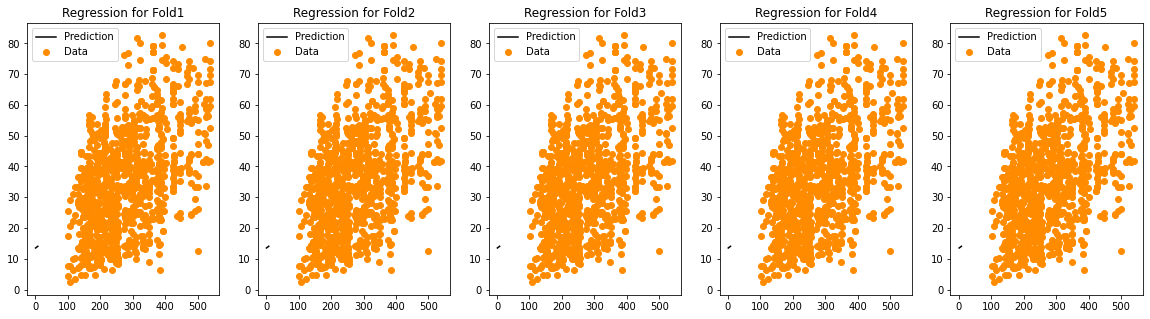

In [47]:
X=data[['Cement']]
Y=data[['Concrete_compressive_strength']]

line=np.linspace(1,8,1000).reshape(-1,1)

fig,axes=plt.subplots(1,5,figsize=(20,5))

low=0
up= data.shape[0]
folds=KFold(n_splits=5)
fold=0

for splits,ax in zip(folds.split(range(low,up)),axes):
     
    x=X.iloc[splits[0]]
    y=Y.iloc[splits[0]]

    xt=X.iloc[splits[1]]
    yt=Y.iloc[splits[1]]

    model=LinearRegression()

    model.fit(X,Y)

    yhat=model.predict(xt.values)
    fold+=1

    print(f"Fold {fold}")
    print("MAE:",mean_absolute_percentage_error(yhat,yt))
    print("MSE:",mean_squared_error(yhat,yt))

    ax.scatter(X.values,Y,c='darkorange',label='Data')
    ax.plot(line,model.predict(line),c='black',label='Prediction')
    ax.legend()
    ax.set_title(f'Regression for Fold{fold}')